In [12]:
%matplotlib inline

In [13]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [14]:
def asympRead(particle, cutoff): 
    return pd.concat([pd.read_csv("output/{0}/asymp-{1:d}.dat".format(particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}/minE.dat".format(particle), header=None, names=["cutscale", "E"], index_col=0)

In [15]:
def plotParticle(ax, pname):
    data, peaks = asympRead(pname, config[pname]["cutscales"])
    plotData = data.loc[(data.index > -np.inf) & (data.index < np.inf)].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+"{:.5f}".format(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[int(pos)][0], ls="--", color=color)

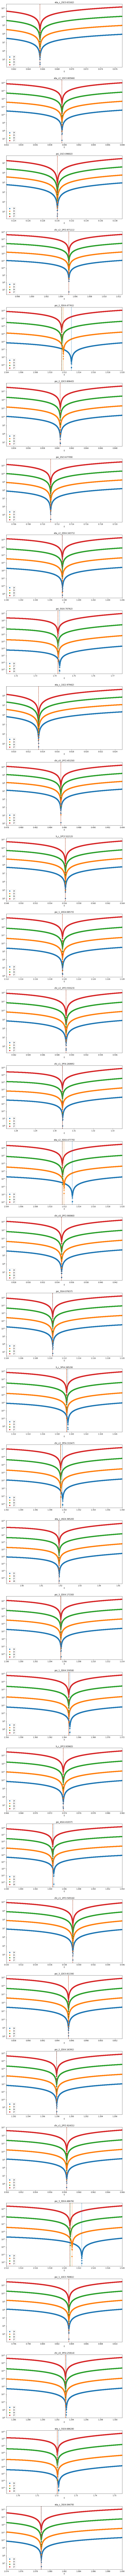

In [16]:
config = json.load(open("particles.cfg"))
fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
for i,pname in enumerate(config.keys()):
    plotParticle(axes[i], pname)

In [17]:
config = json.load(open("particles.cfg"))
for pname in config.keys():
    peaks = pd.read_csv("output/{}/minE.dat".format(pname), header=None, names=["cutscale", "E"], index_col=0)
    print("{}({})".format(pname,peaks.iloc[-1][0]))
    print("peaks - peaks[-1]")
    print(peaks - peaks.iloc[-1])
    print("\n")
    print("peaks[i]-peaks[i-1]")
    print(peaks.diff())
    print("\n---\n")

eta_c_2S(0.6656161054521801)
peaks - peaks[-1]
                     E
cutscale              
14        1.393259e-08
15        5.811499e-10
16       -1.490008e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -1.335144e-08
16       -5.960500e-10
17        1.490008e-11

---

eta_c2_1D(0.8396583728157)
peaks - peaks[-1]
                     E
cutscale              
14        6.682053e-08
15        4.950910e-09
16        2.719399e-10
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -6.186962e-08
16       -4.678970e-09
17       -2.719399e-10

---

psi_1S(0.13002385972906)
peaks - peaks[-1]
                     E
cutscale              
14       -1.089700e-10
15       -4.660022e-12
16        9.300061e-13
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15        1.043100e-10
16   

In [68]:
config = json.load(open("particles.cfg"))
article = pd.read_csv("../data/charmonia.csv", index_col=0)
my = dict()
for pname in config.keys():
    peaks = pd.read_csv("output/{}/minE.dat".format(pname), header=None, names=["cutscale", "E"], index_col=0)
    my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
my = pd.DataFrame.from_dict(my, orient="index")
my.columns = ["my(LP)"]
res = article.join(my)

In [70]:
res.join(\
    res["LP"].subtract(res["my(LP)"], axis=0).abs().rename("dev(LP)")\
).join(\
    res.subtract(res["my(LP)"], axis=0).abs().drop(["my(LP)"], axis=1).min(axis=1).rename("dev(all)")\
).round({"dev(all)": 3, "dev(LP)": 3}).sort_values("dev(LP)")

,exp,8,11,LP,SP,my(LP),dev(LP),dev(all)
name,,,,,,,,
h_c_1P,3525.0,3516.0,3519,3522,3526,3522.131523,0.132,0.132
h_c_2P,NaN,3934.0,3908,3940,3916,3939.834604,0.165,0.165
h_c_3P,NaN,4279.0,4184,4285,4193,4285.291267,0.291,0.291
eta_c2_2D,NaN,4158.0,4099,4164,4108,4163.707662,0.292,0.292
eta_c2_3D,NaN,NaN,4326,4478,4336,4477.701360,0.299,0.299
eta_c2_1D,NaN,3799.0,3796,3806,3805,3805.658373,0.342,0.342
psi_2_3D,NaN,NaN,4327,4478,4340,4477.613528,0.386,0.386
psi_3_2D,NaN,4167.0,4130,4172,4112,4171.498026,0.502,0.502
psi_3_1D,NaN,3806.0,3799,3811,3808,3811.556803,0.557,0.557
